In [1]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA,LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
data=load_iris().data
target=load_iris().target
target_names=load_iris().target_names

In [3]:
dataframe=pd.DataFrame(data=np.concatenate((data,target.reshape(150,1)),axis=1),columns=['col_1','col_2','col_3','col_4','target'])

In [4]:
dataframe.head()
dataframe.drop(columns=['target'],axis=1,inplace=True)

In [5]:
pca = PCA(n_components=2)
X_feature_reduced = pca.fit(dataframe).transform(dataframe)

In [6]:
print ('First component explain {} variance of data and second component explain {} variance of data'.format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))

First component explain 0.9246187232017271 variance of data and second component explain 0.05306648311706782 variance of data


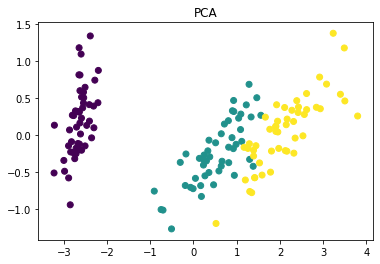

In [7]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title("PCA")
plt.show()

In [8]:
lda = LatentDirichletAllocation(n_components=2)
X_feature_reduced = lda.fit(dataframe).transform(dataframe)

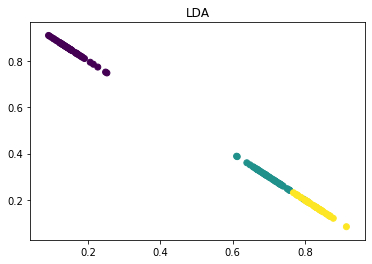

In [9]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title('LDA')
plt.show()

In [10]:
lemmatizer=WordNetLemmatizer() #For words Lemmatization
stop_words=set(stopwords.words('english'))

In [11]:
def TokenizeText(text):
    ''' 
     Tokenizes text by removing various stopwords and lemmatizing them
    '''
    text=re.sub('[^A-Za-z0-9\s]+', '', text)
    word_list=word_tokenize(text)
    word_list_final=[]
    for word in word_list:
        if word not in stop_words:
            word_list_final.append(lemmatizer.lemmatize(word))
    return word_list_final

In [12]:
def gettopicwords(topics,cv,n_words=10):
    '''
        Print top n_words for each topic.
        cv=Countvectorizer
    '''
    for i,topic in enumerate(topics):
        top_words_array=np.array(cv.get_feature_names())[np.argsort(topic)[::-1][:n_words]]
        print ("For  topic {} it's top {} words are ".format(str(i),str(n_words)))
        combined_sentence=""
        for word in top_words_array:
            combined_sentence+=word+" "
        print (combined_sentence)
        print (" ")

In [13]:
import os
os.listdir("/Users/patsnap/Desktop/Neo4J_and_other_codes/Topic_modelling/")

['PCA_LDA_topic_modelling.ipynb',
 '.DS_Store',
 'us-consumer-finance-complaints',
 'abcnews-date-text.csv',
 'topic_modelling_basics.ipynb',
 '.ipynb_checkpoints']

In [14]:
df=pd.read_csv('/Users/patsnap/Desktop/Neo4J_and_other_codes/Topic_modelling/abcnews-date-text.csv',usecols=[1])

In [15]:
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [16]:
%%time 
num_features=100000
cv=CountVectorizer(tokenizer=TokenizeText,max_features=num_features,ngram_range=(1,2))
transformed_data=cv.fit_transform(df['headline_text'])

CPU times: user 3min 2s, sys: 1.54 s, total: 3min 3s
Wall time: 3min 7s


In [17]:
%%time
no_topics=10  ## We can change this, hyperparameter
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(transformed_data)

CPU times: user 34min 31s, sys: 1min 57s, total: 36min 28s
Wall time: 36min 56s


In [18]:
gettopicwords(lda.components_,cv)

For  topic 0 it's top 10 words are 
police woman take final test fire driver nt go royal 
 
For  topic 1 it's top 10 words are 
melbourne rural news family abc indigenous water missing killed community 
 
For  topic 2 it's top 10 words are 
election call court farmer face help charge drug health worker 
 
For  topic 3 it's top 10 words are 
australia queensland coast back council plan cut minister job service 
 
For  topic 4 it's top 10 words are 
say australian interview u south death change state house north 
 
For  topic 5 it's top 10 words are 
new market attack first found tasmania may price claim sex 
 
For  topic 6 it's top 10 words are 
world charged qld country show murder dy man sa cup 
 
For  topic 7 it's top 10 words are 
year child wa win one china hit school canberra get 
 
For  topic 8 it's top 10 words are 
sydney crash home report man car hospital island rate brisbane 
 
For  topic 9 it's top 10 words are 
trump government adelaide say could trial donald set donald tru

In [19]:
docs=df['headline_text'][:10]
data=[]
for doc in docs:
    data.append(lda.transform(cv.transform([doc])))

In [20]:
cols=['topic'+str(i) for i in range(1,11)]
doc_topic_df=pd.DataFrame(columns=cols,data=np.array(data).reshape((10,10)))

In [21]:
doc_topic_df['major_topic']=doc_topic_df.idxmax(axis=1)
doc_topic_df['raw_doc']=docs

In [22]:
doc_topic_df.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,major_topic,raw_doc
0,0.016667,0.850000,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,topic2,aba decides against community broadcasting lic...
1,0.887499,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,topic1,act fire witnesses must be aware of defamation
2,0.012500,0.012500,0.762498,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.137502,topic3,a g calls for infrastructure protection summit
3,0.009091,0.009091,0.009091,0.009091,0.918181,0.009091,0.009091,0.009091,0.009091,0.009091,topic5,air nz staff in aust strike for pay rise
4,0.010000,0.010000,0.010000,0.010001,0.909999,0.010000,0.010000,0.010000,0.010000,0.010000,topic5,air nz strike to affect australian travellers
